# Trabajo Lucía Rodríguez Fernández

In [1]:
import vtk
import random
import numpy as np

vtk.VTK_VERSION

'9.2.6'

In [3]:
from IPython.display import Image
from vtkmodules.vtkCommonColor import vtkNamedColors
def vtk_show(renderer, width=600, height=450):
    """
    Takes vtkRenderer instance and returns an IPython Image with the rendering.
    """
    renderWindow = vtk.vtkRenderWindow()
    renderWindow.SetOffScreenRendering(1)
    renderWindow.AddRenderer(renderer)
    renderWindow.SetSize(width, height)
    renderWindow.Render()

    windowToImageFilter = vtk.vtkWindowToImageFilter()
    windowToImageFilter.SetInput(renderWindow)
    windowToImageFilter.Update()

    writer = vtk.vtkPNGWriter()
    writer.SetWriteToMemory(1)
    writer.SetInputConnection(windowToImageFilter.GetOutputPort())
    writer.Write()
    data = memoryview(writer.GetResult())

    return Image(data)

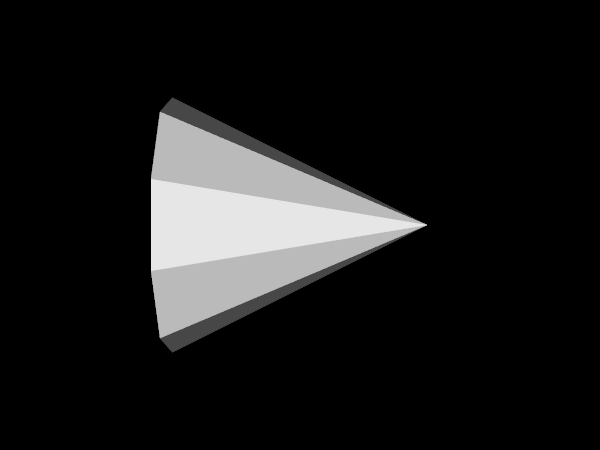

In [4]:
coneSource = vtk.vtkConeSource()
coneSource.SetResolution(10)

mapper = vtk.vtkPolyDataMapper()
mapper.SetInputConnection(coneSource.GetOutputPort())

actor = vtk.vtkActor()
actor.SetMapper(mapper)

renderer = vtk.vtkRenderer()
renderer.AddActor(actor)

renderWindow = vtk.vtkRenderWindow()
renderWindow.AddRenderer(renderer)

renderWindowInteractor = vtk.vtkRenderWindowInteractor()
renderWindowInteractor.SetRenderWindow(renderWindow)
renderWindow.Render()
renderWindowInteractor.Start()

vtk_show(renderer)

## Ejercicio 1

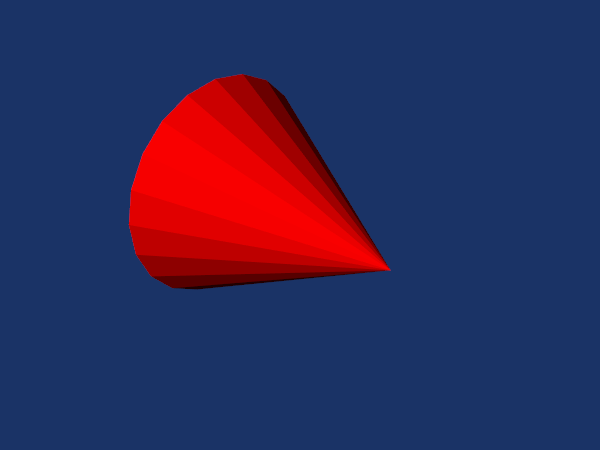

In [5]:
colors = vtkNamedColors()
conoColor = colors.GetColor3d("Red")

coneSource = vtk.vtkConeSource()
coneSource.SetResolution(20)

mapper = vtk.vtkPolyDataMapper()
mapper.SetInputConnection(coneSource.GetOutputPort())

actor = vtk.vtkActor()
actor.SetMapper(mapper)
actor.GetProperty().SetDiffuseColor(conoColor) #cambio de color
actor.RotateX(30) #rotacion x 30
actor.RotateY(-45) #rotacion y -45


renderer = vtk.vtkRenderer()
renderer.AddActor(actor)
renderer.SetBackground(26/255,51/255,102/255)
renderer.ResetCamera()
renderer.GetActiveCamera().Zoom(1.5)

renderWindow = vtk.vtkRenderWindow()
renderWindow.AddRenderer(renderer)
renderWindow.Render()

renderWindowInteractor = vtk.vtkRenderWindowInteractor()
renderWindowInteractor.SetRenderWindow(renderWindow)
renderWindow.Render()
renderWindowInteractor.Start()

vtk_show(renderer)

## Ejercicio 2

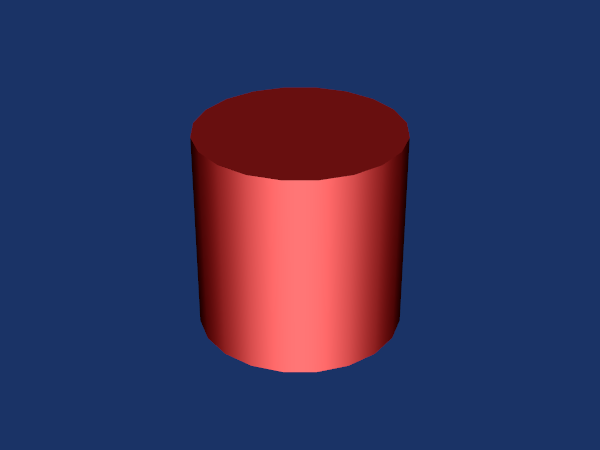

In [6]:
colors = vtkNamedColors()
cylinderColor = colors.GetColor3d("Red")

cylinderSource = vtk.vtkCylinderSource()
cylinderSource.SetResolution(20)

mapper = vtk.vtkPolyDataMapper()
mapper.SetInputConnection(cylinderSource.GetOutputPort())

actor = vtk.vtkActor()
actor.SetMapper(mapper)
actor.GetProperty().SetDiffuseColor(cylinderColor) #cambio de color
actor.GetProperty().SetSpecular(0.8)
actor.GetProperty().SetDiffuse(0.7)
actor.GetProperty().SetSpecularPower(3.8)

actor.RotateX(30) #rotacion x 30
actor.RotateY(-45) #rotacion y -45


renderer = vtk.vtkRenderer()
renderer.AddActor(actor)
renderer.SetBackground(26/255,51/255,102/255)
renderer.ResetCamera()
renderer.GetActiveCamera().Zoom(1.3)

renderWindow = vtk.vtkRenderWindow()
renderWindow.AddRenderer(renderer)
renderWindow.Render()

renderWindowInteractor = vtk.vtkRenderWindowInteractor()
renderWindowInteractor.SetRenderWindow(renderWindow)
renderWindow.Render()
renderWindowInteractor.Start()

vtk_show(renderer)

## Ejercicio  3

In [7]:
def colorRandom(obj,event):
    random_color = [random.random(), random.random(), random.random()]
    actor.GetProperty().SetDiffuseColor(random_color)
    renderWindow.Render()


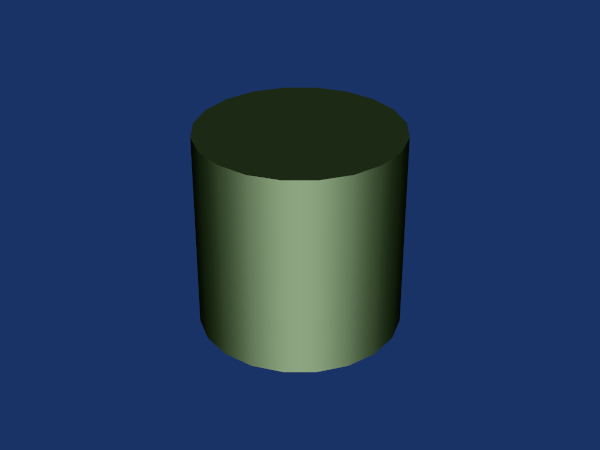

In [8]:
colors = vtkNamedColors()
cylinderColor = colors.GetColor3d("Red")

cylinderSource = vtk.vtkCylinderSource()
cylinderSource.SetResolution(20)

mapper = vtk.vtkPolyDataMapper()
mapper.SetInputConnection(cylinderSource.GetOutputPort())

actor = vtk.vtkActor()
actor.SetMapper(mapper)
actor.GetProperty().SetDiffuseColor(cylinderColor) #cambio de color
actor.GetProperty().SetSpecular(0.8)
actor.GetProperty().SetDiffuse(0.7)
actor.GetProperty().SetSpecularPower(3.8)

actor.RotateX(30) #rotacion x 30
actor.RotateY(-45) #rotacion y -45


renderer = vtk.vtkRenderer()
renderer.AddActor(actor)
renderer.SetBackground(26/255,51/255,102/255)
renderer.ResetCamera()
renderer.GetActiveCamera().Zoom(1.3)

renderWindow = vtk.vtkRenderWindow()
renderWindow.AddRenderer(renderer)
renderWindow.Render()

renderWindowInteractor = vtk.vtkRenderWindowInteractor()
renderWindowInteractor.SetRenderWindow(renderWindow)
renderWindowInteractor.SetInteractorStyle(vtk.vtkInteractorStyleTrackballCamera())
renderWindowInteractor.AddObserver("LeftButtonPressEvent", colorRandom)

renderWindow.Render()
renderWindowInteractor.Start()

vtk_show(renderer)

## Ejercicio 4

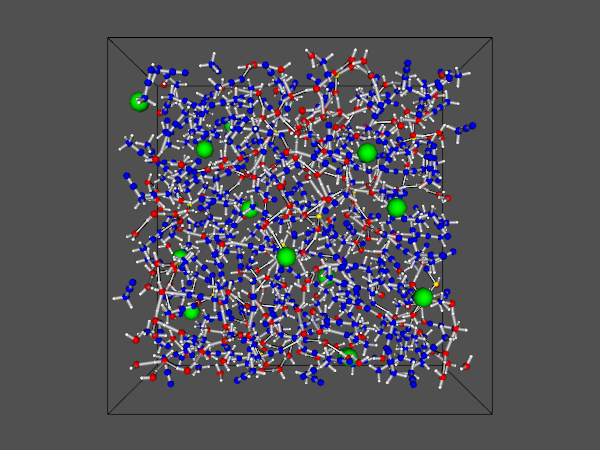

In [9]:
npCoord = np.loadtxt("Datos/atoms-coordinates.txt")
npConnecction = np.loadtxt("Datos/atoms-connections.txt")
npRadio = np.loadtxt("Datos/atoms-radius.txt")

#reader

#Crear points
points = vtk.vtkPoints()

#Crear radio
radius = vtk.vtkFloatArray()
#radius.SetNumberOfComponents(1)

#crear conexiones
conexions = vtk.vtkCellArray()

for coord in npCoord:
    points.InsertNextPoint(coord)

for radio in npRadio:
    radius.InsertNextValue(radio)

escalaRadio = np.unique(radius)

for conexion in npConnecction:
    line = vtk.vtkLine()
    line.GetPointIds().SetId(0, int(conexion[0]))
    line.GetPointIds().SetId(1, int(conexion[1]))
    conexions.InsertNextCell(line)

polydata = vtk.vtkPolyData()
polydata.SetPoints(points)
polydata.GetPointData().SetScalars(radius)
polydata.SetLines(conexions)


sphere = vtk.vtkSphereSource()
atom3D = vtk.vtkGlyph3D()

atom3D.SetSourceConnection(sphere.GetOutputPort())
atom3D.SetInputData(polydata)
atom3D.Update()

#Filter

tubeFilter = vtk.vtkTubeFilter()
tubeFilter.SetInputData(polydata)
tubeFilter.SetRadius(0.2)
tubeFilter.Update()

boundingBox = vtk.vtkOutlineFilter()
boundingBox.SetInputData(polydata)
boundingBox.Update()

#Mapper

atomMapper = vtk.vtkPolyDataMapper()
atomMapper.SetInputConnection(atom3D.GetOutputPort())
atomMapper.Update()

colorTransferFunctionAtom = vtk.vtkColorTransferFunction()

colorTransferFunctionAtom.AddRGBPoint(escalaRadio[0], 1.0, 1.0, 1.0) 
colorTransferFunctionAtom.AddRGBPoint(escalaRadio[1], 1.0, 1.0, 0.0)
colorTransferFunctionAtom.AddRGBPoint(escalaRadio[2], 0.0, 0.0, 1.0)
colorTransferFunctionAtom.AddRGBPoint(escalaRadio[3], 1.0, 0.0, 0.0) 
colorTransferFunctionAtom.AddRGBPoint(escalaRadio[4], 0.0, 0.0, 1.0)
colorTransferFunctionAtom.AddRGBPoint(escalaRadio[5], 0.0, 1.0, 0.0)  

atomMapper.SetLookupTable(colorTransferFunctionAtom)
atomMapper.Update()

colorTransferFunctionATube = vtk.vtkColorTransferFunction()
colorTransferFunctionATube.AddRGBPoint(0.0, 224/255, 224/255, 224/255) 

tubeMapper = vtk.vtkPolyDataMapper()
tubeMapper.SetInputConnection(tubeFilter.GetOutputPort())
tubeMapper.SetLookupTable(colorTransferFunctionATube)
tubeMapper.Update()

boundingBoxMapper = vtk.vtkPolyDataMapper()
boundingBoxMapper.SetInputConnection(boundingBox.GetOutputPort())
boundingBoxMapper.Update()


# Crear el actor para los átomos
atomActor = vtk.vtkActor()
atomActor.SetMapper(atomMapper)

tubeActor = vtk.vtkActor()
tubeActor.SetMapper(tubeMapper)

boundingBoxActor = vtk.vtkActor()
boundingBoxActor.SetMapper(boundingBoxMapper)
boundingBoxActor.GetProperty().SetColor(0.0, 0.0, 0.0)  # Color negro

# Crear el renderizador y la ventana de renderizado
renderer = vtk.vtkRenderer()
renderer.AddActor(atomActor)
renderer.AddActor(tubeActor)
renderer.AddActor(boundingBoxActor)
renderer.SetBackground(80/255,80/255,80/255)
renderer.ResetCamera()

renderWindow = vtk.vtkRenderWindow()
renderWindow.AddRenderer(renderer)

# Crear un interactor para interactuar con la escena
renderWindowInteractor = vtk.vtkRenderWindowInteractor()
renderWindowInteractor.SetRenderWindow(renderWindow)

# Renderizar la escena
renderWindow.Render()

# Ajustar la cámara para que todos los átomos sean visibles
renderer.ResetCamera()
renderer.GetActiveCamera().Zoom(1.3)

# Iniciar el bucle de interacción
renderWindowInteractor.Initialize()
renderWindowInteractor.Start()


vtk_show(renderer)

## Ejercicio 5

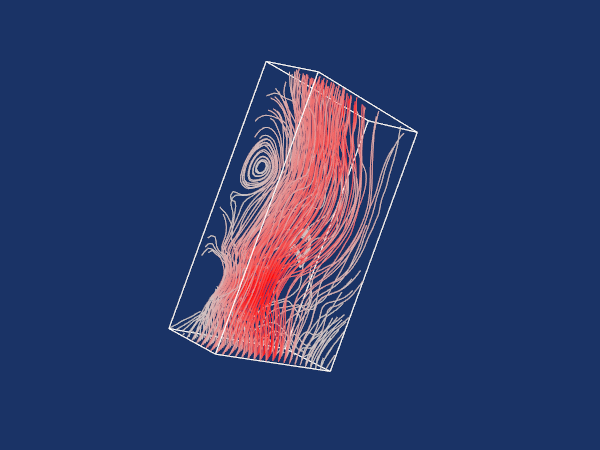

In [62]:
readerWind = vtk.vtkStructuredPointsReader()
readerWind.SetFileName("Datos/Wind.vtk")
readerWind.ReadAllVectorsOn()
readerWind.ReadAllScalarsOn()
readerWind.Update()

windData = readerWind.GetOutput()

rangoEscalares = windData.GetScalarRange()
boundingBoxData = windData.GetBounds()

windLookTable = vtk.vtkLookupTable()
windLookTable.SetRange(rangoEscalares)  # Establecer el rango de los escalares
windLookTable.SetSaturationRange(0.0,1.0)
windLookTable.SetHueRange(0.0, 0.0)
windLookTable.SetValueRange(0.7, 1.0)
windLookTable.Build()

planeSource = vtk.vtkPlaneSource()
planeSource.SetOrigin(boundingBoxData[0], boundingBoxData[2], boundingBoxData[4])
planeSource.SetPoint1(boundingBoxData[1], boundingBoxData[2], boundingBoxData[4])
planeSource.SetPoint2(boundingBoxData[0], boundingBoxData[2], boundingBoxData[5])
planeSource.SetXResolution(20)
planeSource.SetYResolution(10)
planeSource.Update()

stream_tracer = vtk.vtkStreamTracer()
stream_tracer.SetInputConnection(readerWind.GetOutputPort())
stream_tracer.SetSourceConnection(planeSource.GetOutputPort())
stream_tracer.SetMaximumPropagation(140.0)
stream_tracer.Update()

BBox_filter = vtk.vtkOutlineFilter()
BBox_filter.SetInputConnection(readerWind.GetOutputPort())

stream_mapper = vtk.vtkPolyDataMapper()
stream_mapper.SetInputConnection(stream_tracer.GetOutputPort())
stream_mapper.SetScalarRange(rangoEscalares)
stream_mapper.SetLookupTable(windLookTable)
stream_mapper.Update()

BBox_mapper = vtk.vtkPolyDataMapper()
BBox_mapper.SetInputConnection(BBox_filter.GetOutputPort())

stream_actor = vtk.vtkActor()
stream_actor.SetMapper(stream_mapper)
stream_actor.RotateZ(-20) 
stream_actor.RotateY(50)

BBox_actor = vtk.vtkActor()
BBox_actor.SetMapper(BBox_mapper)
BBox_actor.RotateZ(-20) 
BBox_actor.RotateY(50) 

renderer = vtk.vtkRenderer()
renderer.AddActor(stream_actor)
renderer.AddActor(BBox_actor)
renderer.SetBackground(26/255, 51/255, 102/255)

renderWindow = vtk.vtkRenderWindow()
renderWindow.AddRenderer(renderer)

renderWindowInteractor = vtk.vtkRenderWindowInteractor()
renderWindowInteractor.SetRenderWindow(renderWindow)

renderWindow.Render()
renderer.ResetCamera()

renderWindowInteractor.Initialize()
renderWindowInteractor.Start()

vtk_show(renderer)

## Ejercicio 6

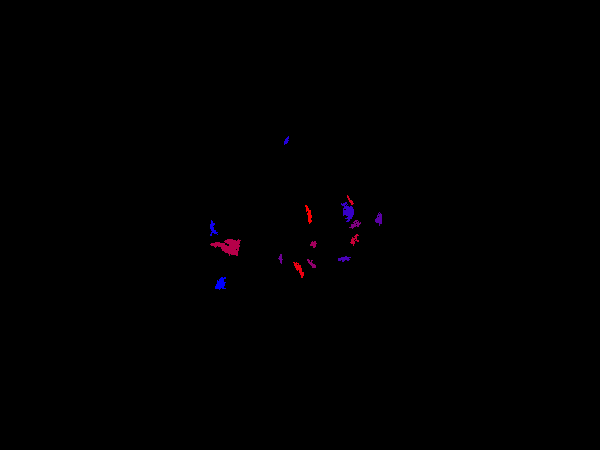

In [4]:
readerTif = vtk.vtkTIFFReader()
readerTif.SetFileName("Datos/asymmetric.tif")
readerTif.Update()

labelMap = readerTif.GetOutput()

rangoEscalaresTif = labelMap.GetScalarRange()

#vtkPiecewiseFunction para poner la opacidad del background a 0 y de todos los objetos a 1 (matriz opacidad)

opacityFunction = vtk.vtkPiecewiseFunction()
opacityFunction.AddPoint(0,0.0) #Background
opacityFunction.AddPoint(1,1.0)

#vtkColorTransferFunction para asignar un color diferente a cada objeto, 
# eg: interpolarlos desde rojo el primer objeto al azul el último objeto

colorFunction = vtk.vtkColorTransferFunction()
colorFunction.AddRGBPoint(rangoEscalaresTif[0]+1, 1.0, 0.0, 0.0) 
colorFunction.AddRGBPoint(rangoEscalaresTif[1], 0.0, 0.0, 1.0)  

# vtkVolumeProperty establece el color y la opacidad de los vóxeles

volumeProperty = vtk.vtkVolumeProperty()

volumeProperty.SetColor(colorFunction)
volumeProperty.SetScalarOpacity(opacityFunction)

#mapper

mapper = vtk.vtkGPUVolumeRayCastMapper()
mapper.SetInputData(labelMap)

#actor

actor = vtk.vtkVolume()
actor.SetMapper(mapper)
actor.SetProperty(volumeProperty)

renderer = vtk.vtkRenderer()
renderer.AddActor(actor)

renderWindow = vtk.vtkRenderWindow()
renderWindow.AddRenderer(renderer)

renderWindowInteractor = vtk.vtkRenderWindowInteractor()
renderWindowInteractor.SetRenderWindow(renderWindow)

renderWindow.Render()
renderer.ResetCamera()

renderWindowInteractor.Initialize()
renderWindowInteractor.Start()

vtk_show(renderer)



## Ejercicio 7

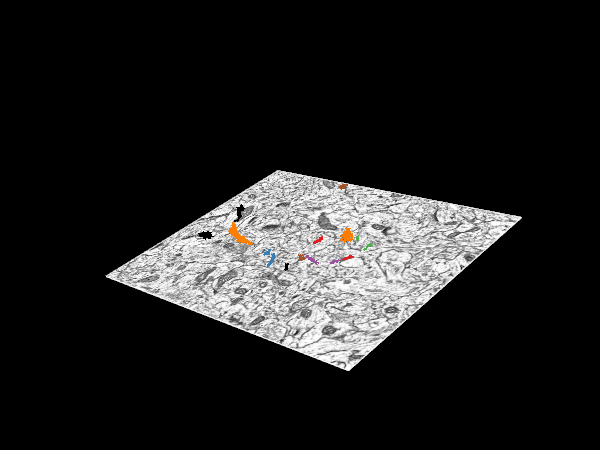

In [49]:
readerTif = vtk.vtkTIFFReader()
readerTif.SetFileName("Datos/asymmetric.tif")
readerTif.Update()

readerTAC = vtk.vtkTIFFReader()
readerTAC.SetFileName("Datos\One-third_resolution_stack.tif")
readerTAC.Update()

labelMap = readerTif.GetOutput()

rangoEscalaresTif = labelMap.GetScalarRange()

#widget
planeWidget = vtk.vtkImagePlaneWidget()
planeWidget.SetInputConnection(readerTAC.GetOutputPort())
planeWidget.SetPlaneOrientationToZAxes()  # Orientación a lo largo del eje Z

#vtkPiecewiseFunction para poner la opacidad del background a 0 y de todos los objetos a 1 (matriz opacidad)

opacityFunction = vtk.vtkPiecewiseFunction()
opacityFunction.AddPoint(0,0.0) #Background
opacityFunction.AddPoint(1,1.0)

colorFunction = vtk.vtkDiscretizableColorTransferFunction()
colors = vtk.vtkColorSeries()

for i in range(int(rangoEscalaresTif[0]+1),int(rangoEscalaresTif[1])):
    colorRGB = colors.GetColorRepeating(i)
    colorFunction.AddRGBPoint(i,colorRGB.GetRed()/255,colorRGB.GetGreen()/255,colorRGB.GetBlue()/255) 

# vtkVolumeProperty establece el color y la opacidad de los vóxeles

volumeProperty = vtk.vtkVolumeProperty()

volumeProperty.SetColor(colorFunction)
volumeProperty.SetScalarOpacity(opacityFunction)

#mapper

mapper = vtk.vtkGPUVolumeRayCastMapper()
mapper.SetInputData(labelMap)

#actor

actor = vtk.vtkVolume()
actor.SetMapper(mapper)
actor.SetProperty(volumeProperty)

renderer = vtk.vtkRenderer()
renderer.AddActor(actor)


renderWindow = vtk.vtkRenderWindow()
renderWindow.AddRenderer(renderer)

renderWindowInteractor = vtk.vtkRenderWindowInteractor()
renderWindowInteractor.SetRenderWindow(renderWindow)

planeWidget.SetInteractor(renderWindowInteractor)
planeWidget.EnabledOn() 

renderWindow.Render()
renderer.ResetCamera()

renderWindowInteractor.Initialize()
renderWindowInteractor.Start()

vtk_show(renderer)

## Ejercicio 8

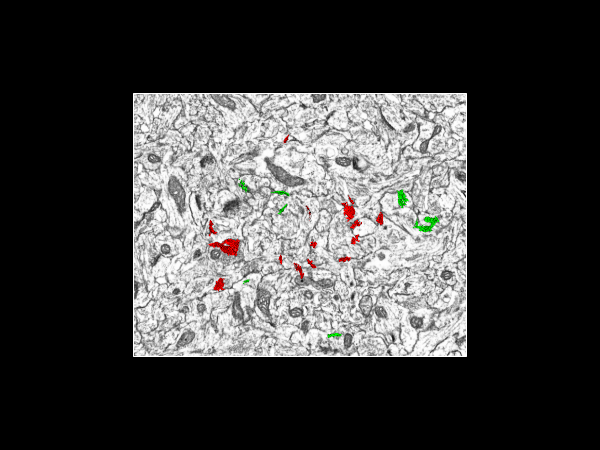

In [28]:
readerAsymm = vtk.vtkTIFFReader()
readerAsymm.SetFileName("Datos/asymmetric.tif")
readerAsymm.Update()

readerSymm = vtk.vtkTIFFReader()
readerSymm.SetFileName("Datos/symmetric.tif")
readerSymm.Update()

readerTAC = vtk.vtkTIFFReader()
readerTAC.SetFileName("Datos\One-third_resolution_stack.tif")
readerTAC.Update()

labelMapAsym = readerAsymm.GetOutput()
labelMapSym = readerSymm.GetOutput()

#widget
planeWidget = vtk.vtkImagePlaneWidget()
planeWidget.SetInputConnection(readerTAC.GetOutputPort())
planeWidget.SetPlaneOrientationToZAxes()  # Orientación a lo largo del eje Z


# Crear el algoritmo de Marching Cubes
marchingCubesAsym = vtk.vtkMarchingCubes()
marchingCubesAsym.SetInputData(labelMapAsym)

marchingCubesSyme = vtk.vtkMarchingCubes()
marchingCubesSyme.SetInputData(labelMapSym)

valorUmbral = 1.0
marchingCubesAsym.SetValue(0, valorUmbral)
marchingCubesSyme.SetValue(0, valorUmbral)

colorTransferFunctionAsym = vtk.vtkColorTransferFunction()
colorTransferFunctionAsym.AddRGBPoint(0.0, 1.0, 0.0, 0.0) 

colorTransferFunctionSym = vtk.vtkColorTransferFunction()
colorTransferFunctionSym.AddRGBPoint(0.0, 0.0, 1.0, 0.0)

#mapper

#mapper para "asymmetric"
mapperAsym = vtk.vtkPolyDataMapper()
mapperAsym.SetInputConnection(marchingCubesAsym.GetOutputPort())
mapperAsym.SetLookupTable(colorTransferFunctionAsym)
mapperAsym.UseLookupTableScalarRangeOn()

#mapper para "symmetric"
mapperSym = vtk.vtkPolyDataMapper()
mapperSym.SetInputConnection(marchingCubesSyme.GetOutputPort())
mapperSym.SetLookupTable(colorTransferFunctionSym)
mapperSym.UseLookupTableScalarRangeOn()

#actores

actorAsym = vtk.vtkActor()
actorAsym.SetMapper(mapperAsym)
actorAsym.GetProperty().SetColor(0.0, 1.0, 0.0)  #color verde para "asymmetric"

actorSym = vtk.vtkActor()
actorSym.SetMapper(mapperSym)
actorSym.GetProperty().SetColor(1.0, 0.0, 0.0)  #color rojo para "symmetric"

renderer = vtk.vtkRenderer()
renderer.AddActor(actorAsym)
renderer.AddActor(actorSym)

renderWindow = vtk.vtkRenderWindow()
renderWindow.AddRenderer(renderer)

renderWindowInteractor = vtk.vtkRenderWindowInteractor()
renderWindowInteractor.SetRenderWindow(renderWindow)

planeWidget.SetInteractor(renderWindowInteractor)
planeWidget.EnabledOn() 

renderWindow.Render()
renderer.ResetCamera()

renderWindowInteractor.Initialize()
renderWindowInteractor.Start()

vtk_show(renderer)